Jacob Nava: 1001468519
Feras Abdel-Rahim: 1001549784

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [3]:
df = pd.read_csv('churn_data.csv')

print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("Missing values:\n", df.isnull().sum())

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


df.drop('customerID', axis=1, inplace=True)


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
import pandas as pd

df = pd.read_csv('churn_data.csv')

df = df.drop(columns=['customerID'])


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

df.head()


C:\Users\jacob\AppData\Local\Temp\ipykernel_9688\3613803379.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,34,1,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


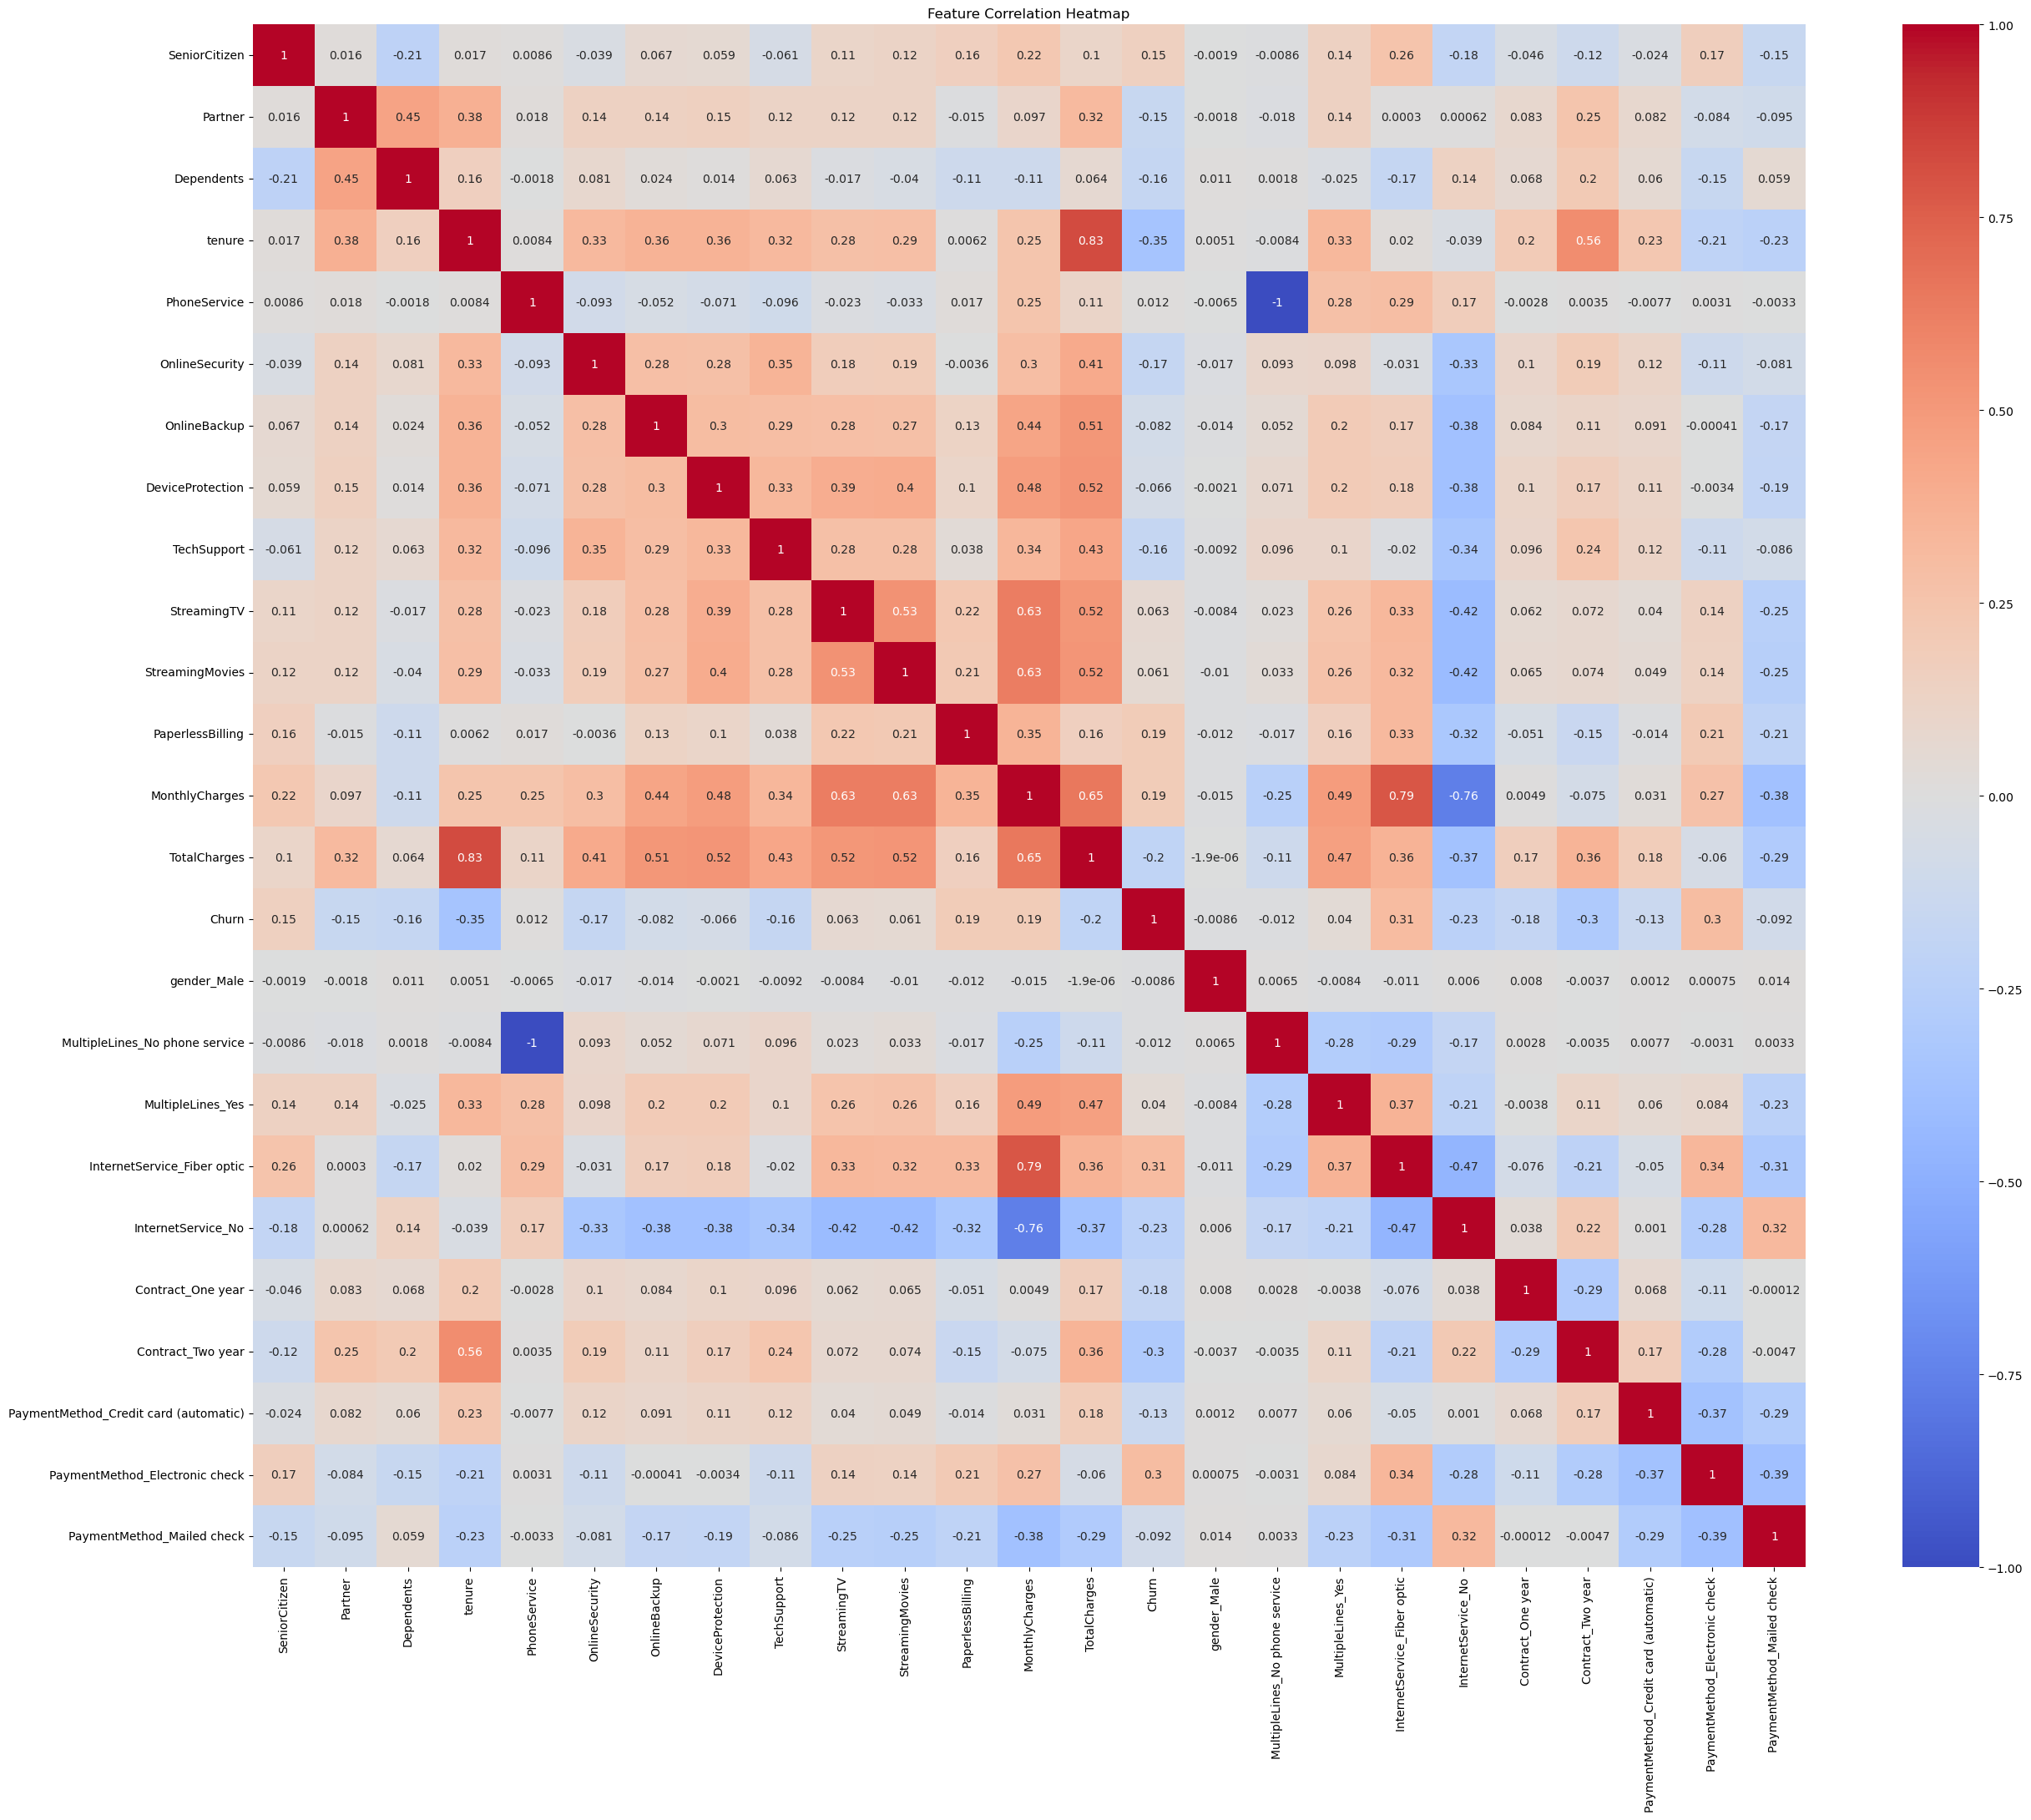

In [6]:
plt.figure(figsize=(30, 24))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


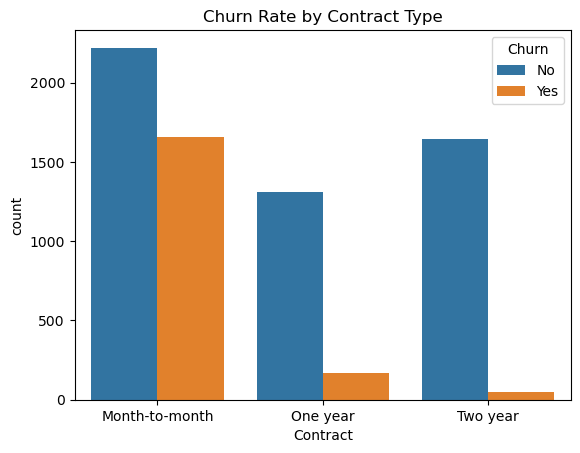

In [7]:
df_raw = pd.read_csv('churn_data.csv')
sns.countplot(data=df_raw, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()


In [22]:
import pandas as pd

churn_counts = df['Churn'].value_counts(normalize=True) * 100
churn_summary = pd.DataFrame({
    'Customer Status': ['Did Not Churn', 'Churned'],
    'Percentage': [churn_counts[0], churn_counts[1]]
})

print("📊 Churn Distribution\n")
print(churn_summary.to_string(index=False))


📊 Churn Distribution

Customer Status  Percentage
  Did Not Churn   73.463013
        Churned   26.536987


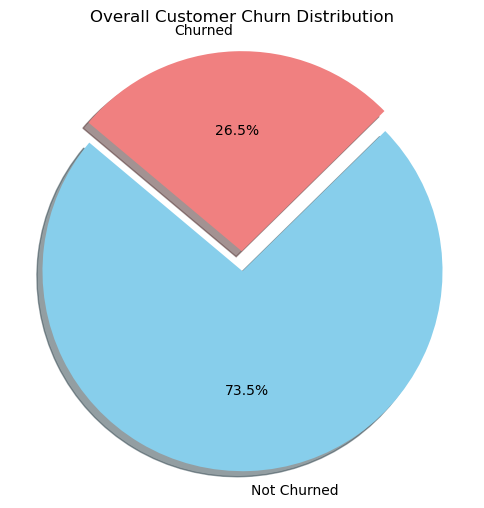

In [23]:
import matplotlib.pyplot as plt

# Calculate churn distribution
churn_counts = df['Churn'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['skyblue', 'lightcoral']
explode = (0.05, 0.05)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)
plt.title('Overall Customer Churn Distribution')
plt.axis('equal')
plt.show()


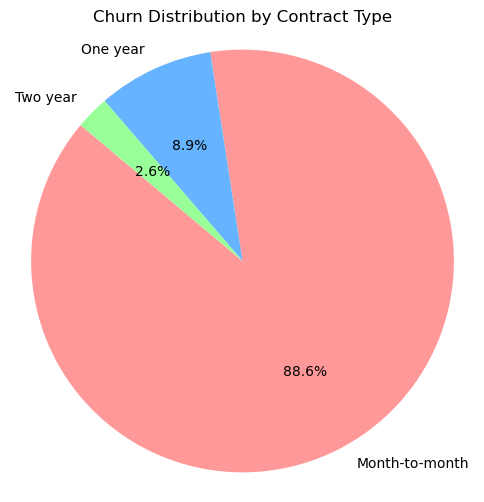

In [8]:
import matplotlib.pyplot as plt

churn_only = df_raw[df_raw['Churn'] == 'Yes']

contract_churn_counts = churn_only['Contract'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(contract_churn_counts,
        labels=contract_churn_counts.index,
        autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99'],
        startangle=140)
plt.title('Churn Distribution by Contract Type')
plt.axis('equal')
plt.show()


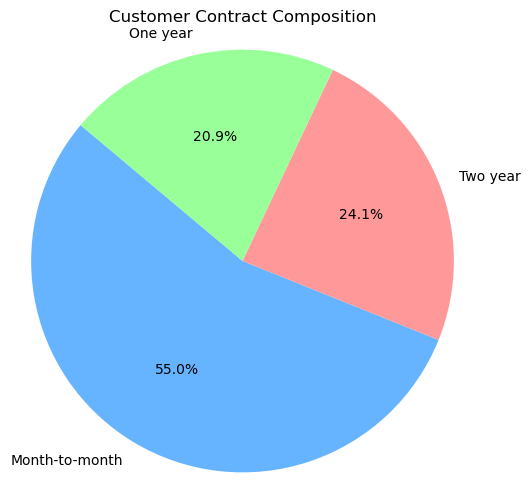

In [9]:
contract_all_counts = df_raw['Contract'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(contract_all_counts, labels=contract_all_counts.index,
        autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'], startangle=140)
plt.title('Customer Contract Composition')
plt.axis('equal')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)

print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression:
[[934 102]
 [151 222]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

import numpy as np
y_pred_thresh = np.where(y_proba >= 0.4, 1, 0)

from sklearn.metrics import confusion_matrix, classification_report

print("Logistic Regression with threshold 0.4:")
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


Logistic Regression with threshold 0.4:
[[863 173]
 [113 260]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1036
           1       0.60      0.70      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.80      0.80      1409



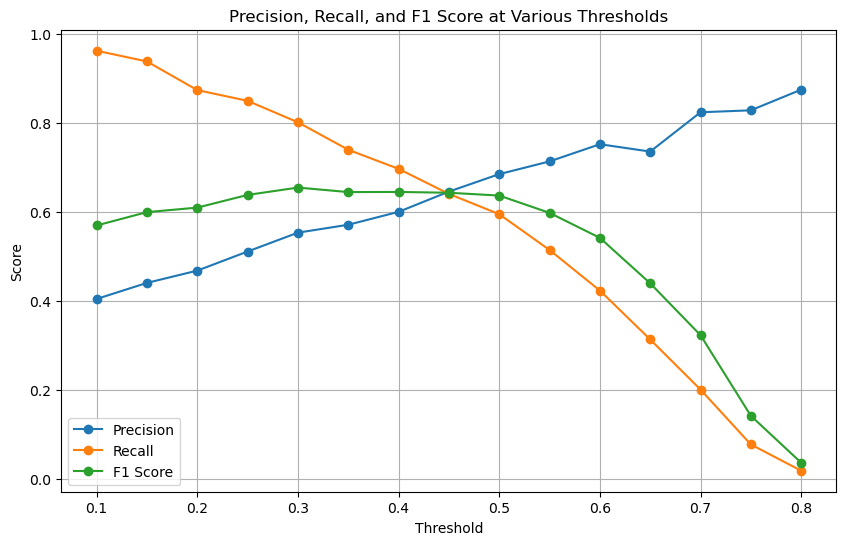

Best Threshold (by F1): 0.30 with F1 Score = 0.65
Confusion Matrix at Best Threshold:
[[795 241]
 [ 74 299]]

Classification Report at Best Threshold:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.80      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.78      0.79      1409



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.1, 0.85, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

for t in thresholds:
    y_pred = np.where(y_proba >= t, 1, 0)
    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.title('Precision, Recall, and F1 Score at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

best_index = np.argmax(f1_scores)
best_thresh = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Best Threshold (by F1): {best_thresh:.2f} with F1 Score = {best_f1:.2f}")

y_pred_best = np.where(y_proba >= best_thresh, 1, 0)
print("Confusion Matrix at Best Threshold:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report at Best Threshold:")
print(classification_report(y_test, y_pred_best))



📊 Decision Tree (Threshold=0.4)
Confusion Matrix:
 [[859 177]
 [111 262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1036
           1       0.60      0.70      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.80      0.80      1409



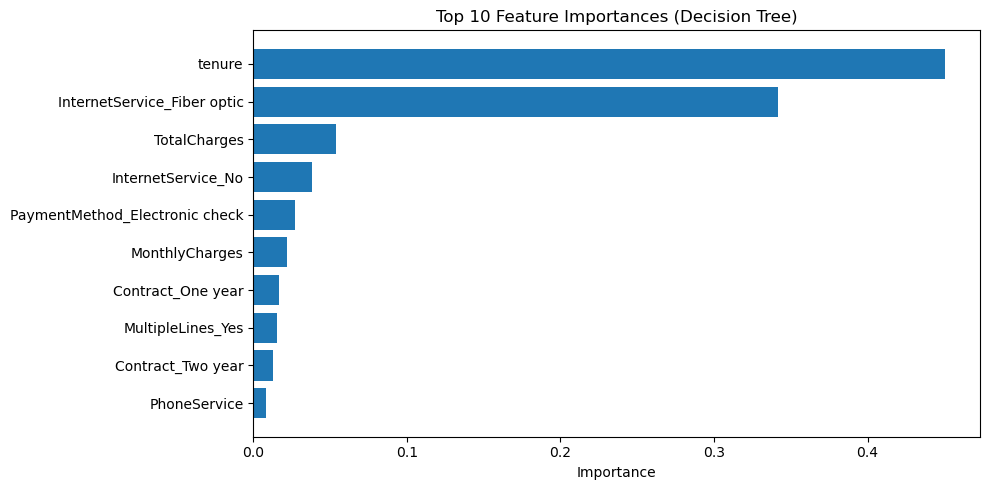

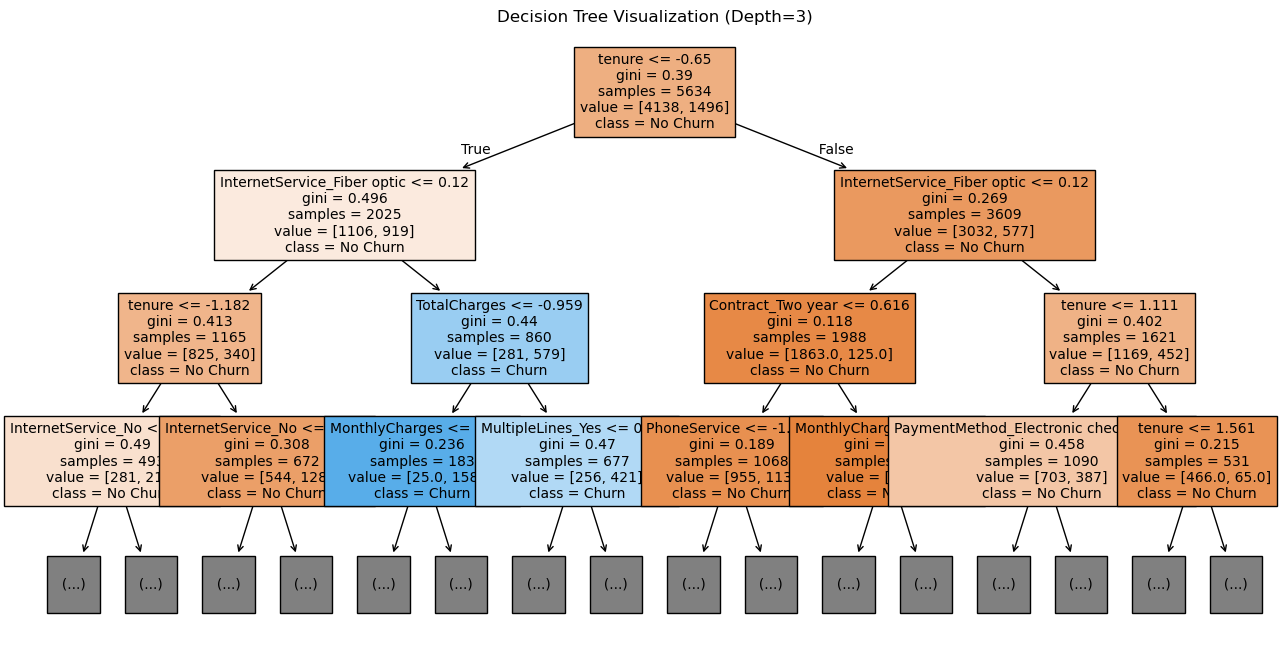


🔁 10-Fold Cross-Validation with Threshold = 0.4
Fold 1: Accuracy=0.807, Precision=0.636, Recall=0.636
Fold 2: Accuracy=0.804, Precision=0.637, Recall=0.610
Fold 3: Accuracy=0.787, Precision=0.585, Recall=0.679
Fold 4: Accuracy=0.793, Precision=0.608, Recall=0.608
Fold 5: Accuracy=0.793, Precision=0.605, Recall=0.631
Fold 6: Accuracy=0.778, Precision=0.579, Recall=0.610
Fold 7: Accuracy=0.743, Precision=0.515, Recall=0.556
Fold 8: Accuracy=0.798, Precision=0.618, Recall=0.631
Fold 9: Accuracy=0.797, Precision=0.626, Recall=0.583
Fold 10: Accuracy=0.790, Precision=0.617, Recall=0.551

📈 Average 10-Fold Scores (Threshold=0.4):
Accuracy : 0.789 ± 0.017
Precision: 0.603 ± 0.035
Recall   : 0.609 ± 0.037


In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Churn'])
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train_scaled, y_train)

y_proba_tree = dtree.predict_proba(X_test_scaled)[:, 1]

threshold = 0.4
y_pred_thresh_tree = np.where(y_proba_tree > threshold, 1, 0)

print(f"\n📊 Decision Tree (Threshold={threshold})")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh_tree))

importances = dtree.feature_importances_
feat_names = X.columns

importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
plot_tree(dtree, feature_names=feat_names, class_names=['No Churn', 'Churn'],
          filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (Depth=3)")
plt.show()

print("\n🔁 10-Fold Cross-Validation with Threshold = 0.4")

X_scaled = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies, precisions, recalls = [], [], []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled, y), 1):
    X_train_cv, X_val_cv = X_scaled[train_idx], X_scaled[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
    
    model = DecisionTreeClassifier(max_depth=5, random_state=42)
    model.fit(X_train_cv, y_train_cv)
    
    y_proba_cv = model.predict_proba(X_val_cv)[:, 1]
    y_pred_cv = np.where(y_proba_cv > threshold, 1, 0)
    
    acc = accuracy_score(y_val_cv, y_pred_cv)
    prec = precision_score(y_val_cv, y_pred_cv)
    rec = recall_score(y_val_cv, y_pred_cv)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    
    print(f"Fold {fold}: Accuracy={acc:.3f}, Precision={prec:.3f}, Recall={rec:.3f}")

print("\n📈 Average 10-Fold Scores (Threshold=0.4):")
print(f"Accuracy : {np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}")
print(f"Precision: {np.mean(precisions):.3f} ± {np.std(precisions):.3f}")
print(f"Recall   : {np.mean(recalls):.3f} ± {np.std(recalls):.3f}")





In [15]:
import pandas as pd
import numpy as np

y_proba = logreg.predict_proba(X_test_scaled)[:, 1]  

thresholds = [0.3, 0.4]
results = []

for thresh in thresholds:
    y_pred = np.where(y_proba >= thresh, 1, 0)
    false_negatives = (y_test == 1) & (y_pred == 0)
    missed = false_negatives.sum()
    cost = missed * 500 

    results.append({
        'Threshold': thresh,
        'False Negatives': missed,
        'Estimated Cost ($)': cost
    })

cost_df = pd.DataFrame(results)
display(cost_df)


,Threshold,False Negatives,Estimated Cost ($)
0,0.3,74,37000
1,0.4,113,56500


In [16]:
thresholds = [0.3, 0.4]
fp_results = []

for thresh in thresholds:
    y_pred = (y_proba >= thresh).astype(int)
    
    false_positives = ((y_test == 0) & (y_pred == 1))
    fp_count = false_positives.sum()
    fp_cost = fp_count * 50 
    
    fp_results.append({
        'Threshold': thresh,
        'False Positives': fp_count,
        'Estimated FP Cost ($)': fp_cost
    })

import pandas as pd
fp_df = pd.DataFrame(fp_results)
display(fp_df)


,Threshold,False Positives,Estimated FP Cost ($)
0,0.3,241,12050
1,0.4,173,8650
